# Implementation of Logistic Regression Model from Scratch

## Data Information

### Features Overview

Each row in the dataset corresponds to a patient’s medical data, with the following key features:

    - id: Unique identifier for each patient.

    - gender: Gender of the patient (e.g., Male, Female, Other).

    - age: Age of the patient.

    - hypertension: Whether the patient has hypertension (1) or not (0).

    - heart_disease: Whether the patient has a heart disease (1) or not (0).

    - ever_married: Marital status of the patient.

    - work_type: Type of occupation (e.g., Private, Govt_job, Self-employed).

    - Residence_type: Whether the patient lives in an urban or rural area.

    - avg_glucose_level: Average glucose level of the patient.

    - bmi: Body Mass Index of the patient.

    - smoking_status: Smoking habits (e.g., formerly smoked, never smoked).

    - stroke: Target variable (1 = Stroke, 0 = No stroke).

## Importing Dataset

In [105]:
# Import the required modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [106]:
# Load the dataset
df = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

## Data Exploration

In [8]:
# 1. Missing Values Analysis
print("Missing Values:")
df.isnull().sum()

Missing Values:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# 2. Summary Statistics for Numerical Columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


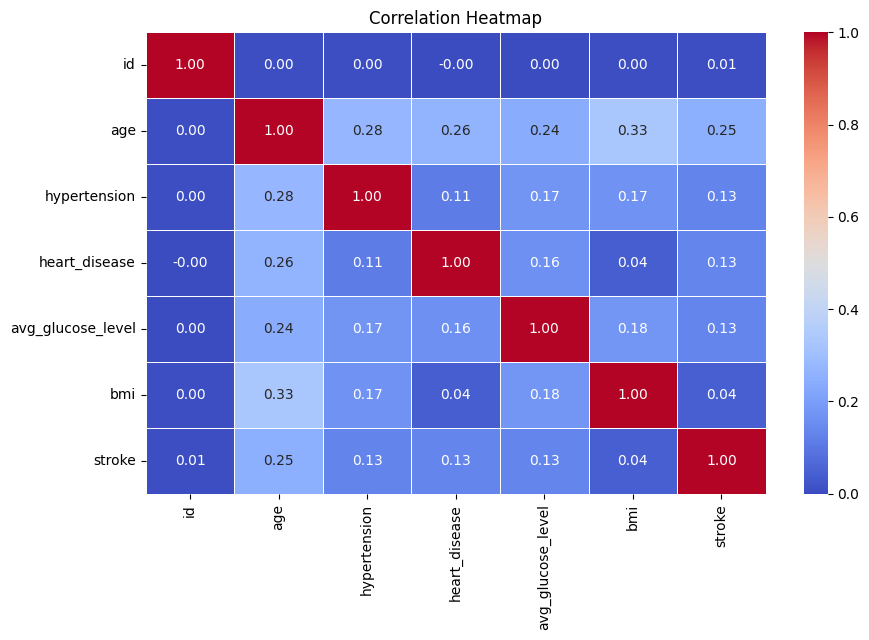

In [9]:
# 3. Correlation Analysis (Numerical Features)
correlation_matrix = df.corr(numeric_only=True)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

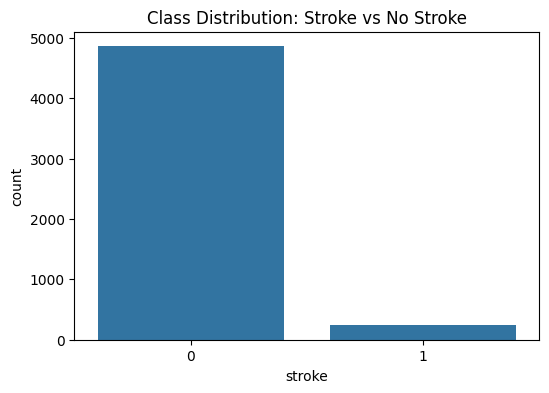

In [10]:
# 4. Class Distribution (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Class Distribution: Stroke vs No Stroke')
plt.show()

<Axes: xlabel='bmi', ylabel='Count'>

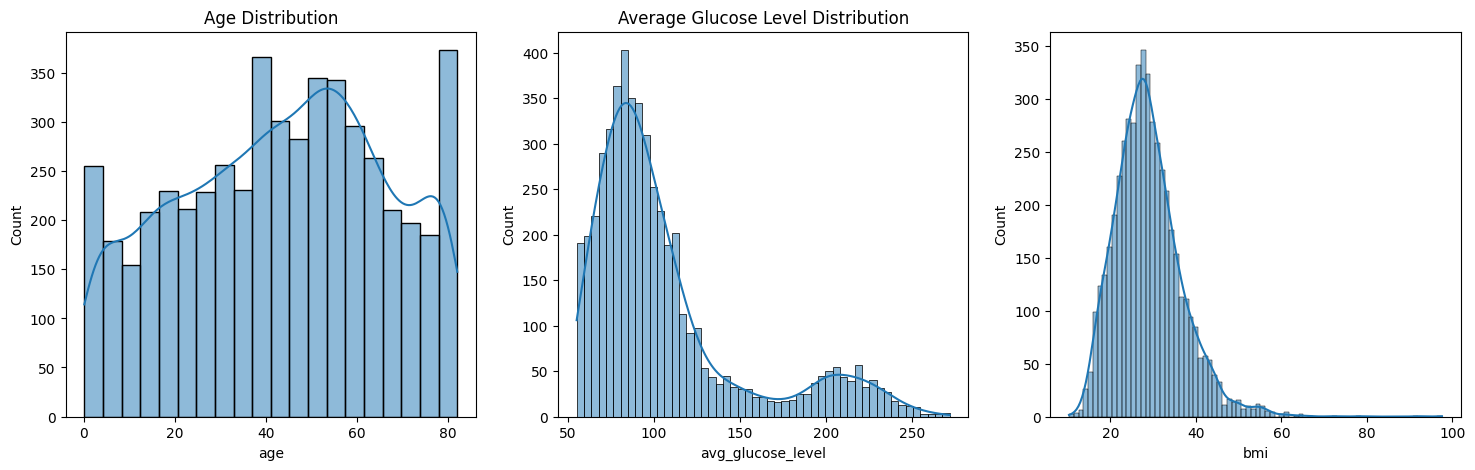

In [11]:
# 5. Continuous Features Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[1])
axes[1].set_title('Average Glucose Level Distribution')

sns.histplot(df['bmi'], kde=True, ax=axes[2])

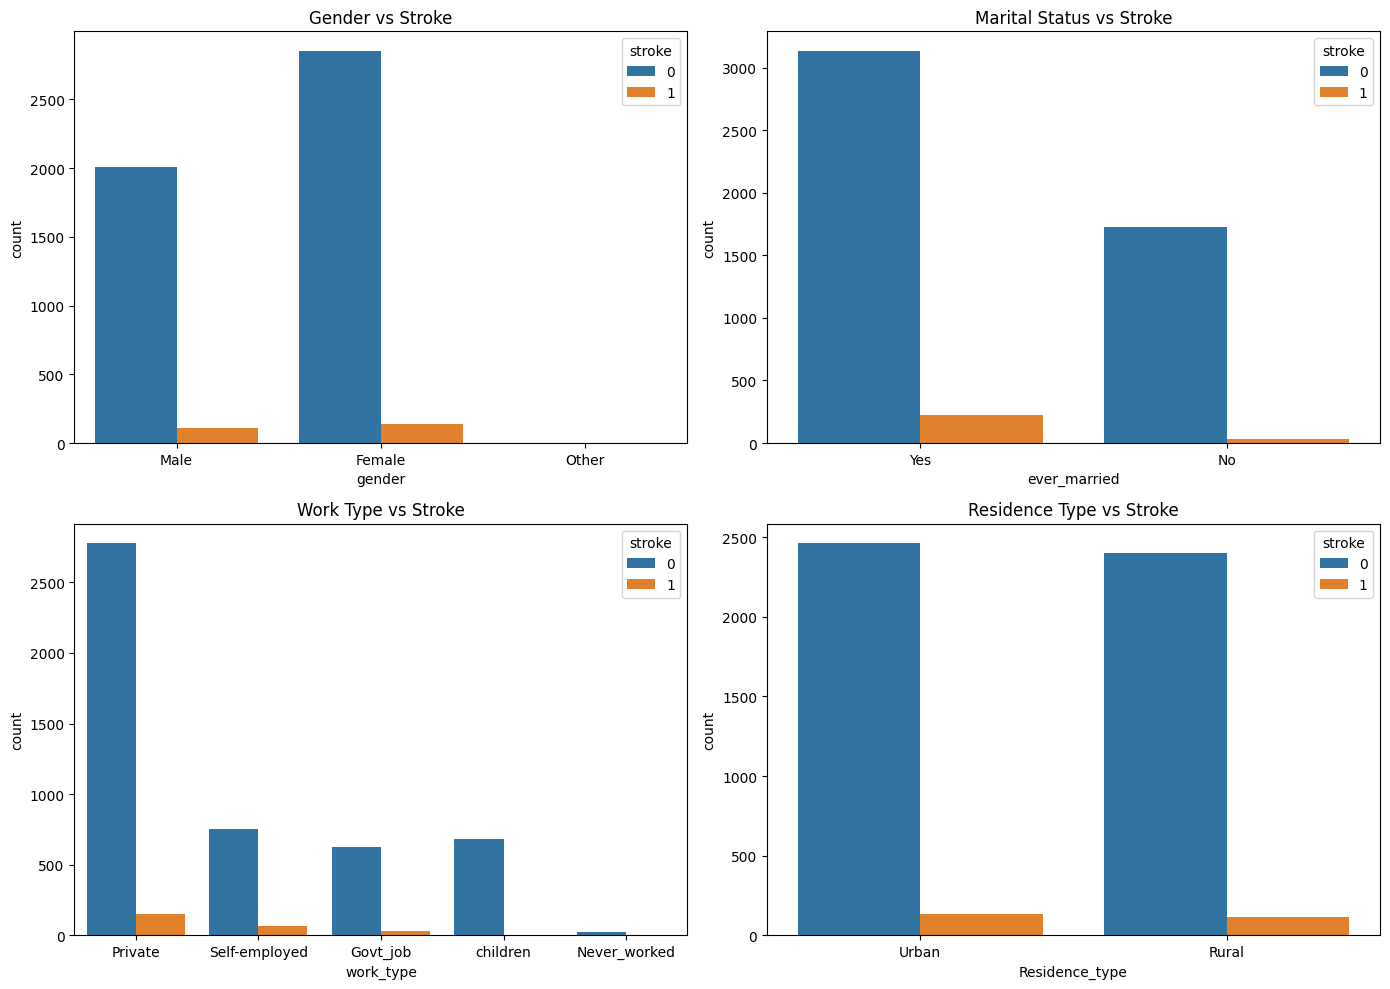

In [12]:
# 6. Categorical Features vs Stroke
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='gender', hue='stroke', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Stroke')
sns.countplot(x='ever_married', hue='stroke', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Marital Status vs Stroke')
sns.countplot(x='work_type', hue='stroke', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Work Type vs Stroke')
sns.countplot(x='Residence_type', hue='stroke', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Residence Type vs Stroke')
plt.tight_layout()
plt.show()

In [13]:
# 7. Extracting Unique Values from Categorical Features
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Data Preprocessing

    Handle Missing Values

The bmi column has missing values. We will fill them with the mean BMI value.

    Encode Categorical Features

Convert categorical columns (like gender, work_type, etc.) to numerical values using one-hot encoding.

    Feature Scaling

Normalize continuous features (age, avg_glucose_level, bmi) using StandardScaler to improve the convergence of gradient descent.

    Split Features and Labels

Separate the dataset into features (X) and target (y).

In [107]:
# 1. Handle Missing Values by filling with the mean BMI
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 2. Convert Categorical Features to One-Hot Encoded Columns
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Split Features and Target
X = df_encoded.drop('stroke', axis=1).values  # Feature matrix
y = df_encoded['stroke'].values  # Target vector

# 4. Split the Dataset into Training (60%), Validation (20%), and Test (20%) Sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# 5. Apply SMOTE to the Training Set to Handle Class Imbalance

smote = SMOTE(random_state=42)  # Initialize SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Set Size: {X_train.shape[0]}")
print(f"Resampled Training Set Size: {X_train_resampled.shape[0]}")

# 6. Feature Scaling (Standardization) – Fit on Training, Apply on All

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit & transform on training set
X_val = scaler.transform(X_val)  # Transform validation set
X_test = scaler.transform(X_test)  # Transform test set

# 7. Check the first few rows of the scaled feature matrix for training data
print("\nScaled Feature Matrix (Training Set - First 5 Rows):")
print(X_train_resampled[:5])

Training set size: 3066 samples
Validation set size: 1022 samples
Test set size: 1022 samples
Original Training Set Size: 3066
Resampled Training Set Size: 5834

Scaled Feature Matrix (Training Set - First 5 Rows):
[[-0.14567401 -0.51877295  2.42684189 -0.42934444 -0.66158608 -0.09260234
   1.29100293 -0.01309345  0.56142503 -0.04539986  0.95391145 -0.58307659
  -0.27565689 -1.07546666 -0.61101072 -0.80177206 -0.50641268]
 [-1.48946364  0.9294357  -0.52738225 -0.42934444  2.19764482 -0.26476498
   1.29100293 -0.01309345  0.56142503 -0.04539986 -1.27027311 -0.58307659
  -0.27565689  1.10829152 -0.61101072  1.48242864 -0.50641268]
 [-1.17256015 -0.37862372 -0.52738225 -0.42934444 -0.46725544  0.30216198
   1.29100293 -0.01309345  0.56142503 -0.04539986  0.95391145 -0.58307659
  -0.27565689 -1.07546666 -0.61101072  1.48242864 -0.50641268]
 [-0.85684475  0.97615211 -0.52738225  3.04408585 -0.30521042 -0.06004135
   1.29100293 -0.01309345  0.56142503 -0.04539986 -1.27027311  2.10105914
  -0

/var/folders/20/gjlczy8j54qdqbtss9yq2xhm0000gn/T/ipykernel_87142/2037229101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


## Modelling

In [183]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization=0.0, class_weights=None):
        """
        Initialize the logistic regression model with:
        - learning_rate: Step size for gradient descent updates.
        - n_iters: Number of iterations for gradient descent.
        - regularization: L2 regularization parameter (lambda).
        - class_weights: Dictionary with weights for each class {0: weight_0, 1: weight_1}.
        """
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.class_weights = class_weights  # Optional class weights
        self.weights = None  # Weight vector
        self.bias = None  # Bias term
        self.loss_history = []  # Track loss for each iteration

    def sigmoid(self, z):
        """Sigmoid activation function: Converts linear output to probabilities."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        """
        Compute the binary cross-entropy loss with optional class weights and L2 regularization.
        """
        n_samples = len(y_true)

        # Use uniform weights if class weights are not provided
        if self.class_weights is None:
            weights = np.ones(n_samples)  # Uniform weights
        else:
            # Apply class weights based on the true label
            weights = np.array([self.class_weights[int(label)] for label in y_true])

        # Calculate weighted binary cross-entropy loss
        loss = -(1 / n_samples) * np.sum(
            weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        )

        # L2 regularization term
        l2_penalty = (self.regularization / (2 * n_samples)) * np.sum(self.weights ** 2)

        return loss + l2_penalty  # Total loss with regularization

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        """
        Train the logistic regression model using Batch Gradient Descent.
        
        Parameters:
        - X_train: Training feature matrix.
        - y_train: Training target vector.
        - X_test: Test feature matrix (optional).
        - y_test: Test target vector (optional).
        """
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.bias = 0  # Initialize bias to zero
        self.loss_history = []  # Track training loss
        self.test_loss_history = []  # Track test loss (if provided)

        # Gradient descent loop
        for i in range(self.n_iters):
            # Calculate the linear model for training data: X_train * weights + bias
            linear_model_train = np.dot(X_train, self.weights) + self.bias
            y_predicted_train = self.sigmoid(linear_model_train)

            # Compute and store the training loss
            train_loss = self.compute_loss(y_train, y_predicted_train)
            self.loss_history.append(train_loss)

            # If test data is provided, compute and store the test loss
            if X_test is not None and y_test is not None:
                linear_model_test = np.dot(X_test, self.weights) + self.bias
                y_predicted_test = self.sigmoid(linear_model_test)
                test_loss = self.compute_loss(y_test, y_predicted_test)
                self.test_loss_history.append(test_loss)

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted_train - y_train)) + \
                (self.regularization / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted_train - y_train)

            # Update weights and bias using gradients and learning rate
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_prob(self, X):
        """Predict probabilities for each input sample."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Predict class labels (0 or 1) based on a custom threshold."""
        y_pred_prob = self.predict_prob(X)
        return [1 if i >= threshold else 0 for i in y_pred_prob]

In [198]:
# Define the function for Evaluating the Model

def accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    y_true: True labels.
    y_pred: Predicted labels.
    """
    correct_predictions = np.sum(np.array(y_true) == np.array(y_pred))  # Count correct predictions
    accuracy_value = correct_predictions / len(y_true)  # Calculate accuracy
    return accuracy_value
    
def f1_score(y_true, y_pred):
    """
    Calculate the Precision, Recall, and F1-Score from scratch.

    Parameters:
    y_true (list or numpy array): Actual class labels (0 or 1).
    y_pred (list or numpy array): Predicted class labels (0 or 1).

    Returns:
    tuple: Precision, Recall, and F1-Score.
    """
    # Initialize confusion matrix components
    TP = sum((y_true[i] == 1) and (y_pred[i] == 1) for i in range(len(y_true)))
    FP = sum((y_true[i] == 0) and (y_pred[i] == 1) for i in range(len(y_true)))
    FN = sum((y_true[i] == 1) and (y_pred[i] == 0) for i in range(len(y_true)))

    # Calculate Precision: TP / (TP + FP)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

    # Calculate Recall: TP / (TP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # Calculate F1-Score: Harmonic mean of Precision and Recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return precision, recall, f1

def loss_curve(model):
    """
    Plot the loss curve for both training and test loss to visualize convergence.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))

    # Plot training loss
    plt.plot(range(len(model.loss_history)), model.loss_history, label='Training Loss')

    # Plot test loss, if available
    if model.test_loss_history:
        plt.plot(range(len(model.test_loss_history)), model.test_loss_history, label='Test Loss', linestyle='--')

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Curve (Training vs. Test)')
    plt.legend()
    plt.show()

def compute_loss_for_threshold(y_true, y_prob, threshold):
    """
    Compute binary cross-entropy loss for a single threshold.
    
    Parameters:
    - y_true: Ground truth labels (0 or 1).
    - y_prob: Predicted probabilities.
    - threshold: Threshold for binary classification.
    
    Returns:
    - Binary cross-entropy loss.
    """
    # Apply the threshold to get binary predictions
    y_pred = [1 if prob >= threshold else 0 for prob in y_prob]

    # Compute binary cross-entropy loss
    loss = -(1 / len(y_true)) * np.sum(
        y_true * np.log(np.array(y_pred) + 1e-9) + 
        (1 - y_true) * np.log(1 - np.array(y_pred) + 1e-9)
    )
    return loss

In [185]:
# Initialize and train the baseline logistic regression model (no weights, no regularization)
baseline_model = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization=0.0)
baseline_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set using the default threshold of 0.5
y_val_pred_baseline = baseline_model.predict(X_val)

### Hyper-parameter Tuning

In [143]:
# Define hyperparameter ranges to test
learning_rates = [0.1, 0.3, 1]
regularizations = [0.01, 0.1, 1.0]

best_f1_score = 0  # Track the best F1-score
best_params = {}  # Store the best parameters

# Grid search for hyperparameter tuning using the validation set
for lr in learning_rates:
    for reg in regularizations:
        # Train logistic regression with current hyperparameters
        model = LogisticRegression(
            learning_rate=lr, 
            n_iters=1000, 
            regularization=reg
        )
        model.fit(X_train_resampled, y_train_resampled)

        # Predict on the validation set
        y_val_pred = model.predict(X_val)

        # Calculate precision, recall, and F1-score on the validation set
        precision, recall, val_f1_score = f1_score(y_val, y_val_pred)

        # Print the current hyperparameters and corresponding F1-score
        print(f"LR: {lr}, Reg: {reg}, Validation F1-Score: {val_f1_score:.4f}")

        # Update best parameters if the current F1-score is higher
        if val_f1_score > best_f1_score:
            best_f1_score = val_f1_score
            best_params = {'learning_rate': lr, 'regularization': reg}

# Print the best hyperparameters and corresponding F1-score
print(f"\nBest Hyperparameters: {best_params}, Best Validation F1-Score: {best_f1_score:.4f}")

LR: 0.1, Reg: 0.01, Validation F1-Score: 0.2235
LR: 0.1, Reg: 0.1, Validation F1-Score: 0.2235
LR: 0.1, Reg: 1.0, Validation F1-Score: 0.2235
LR: 0.3, Reg: 0.01, Validation F1-Score: 0.2266
LR: 0.3, Reg: 0.1, Validation F1-Score: 0.2266
LR: 0.3, Reg: 1.0, Validation F1-Score: 0.2266
LR: 1, Reg: 0.01, Validation F1-Score: 0.2266
LR: 1, Reg: 0.1, Validation F1-Score: 0.2266
LR: 1, Reg: 1.0, Validation F1-Score: 0.2266

Best Hyperparameters: {'learning_rate': 0.3, 'regularization': 0.01}, Best Validation F1-Score: 0.2266


In [192]:
# Train the final model with the best hyperparameters
best_model = LogisticRegression(
    learning_rate=best_params['learning_rate'], 
    n_iters=1000, 
    regularization=best_params['regularization']
)
best_model.fit(X_train_resampled, y_train_resampled, X_test=X_test, y_test=y_test)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

In [200]:
# Predict probabilities on the test set
y_test_prob = best_model.predict_prob(X_test)

# Use a custom threshold to balance precision and recall
threshold = 0.55
y_test_pred_adjusted = [1 if prob >= threshold else 0 for prob in y_test_prob]

## Evaluation

In [188]:
# Calculate Precision, Recall, and F1-Score
precision, recall, baseline_f1_score = f1_score(y_val, y_val_pred_baseline)
accuracy_score = accuracy(y_val, y_val_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {baseline_f1_score:.4f}")

Accuracy: 0.7329
Precision: 0.1238, Recall: 0.8000, F1-Score: 0.2145


In [189]:
# Evaluate precision and recall 
precision, recall, f1 = f1_score(y_test, y_test_pred)
accuracy_score = accuracy(y_test, y_test_pred)

print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Accuracy: 0.7417
Precision: 0.1285, Recall: 0.7400, F1-Score: 0.2189


In [190]:
# Evaluate the F1-score with the new threshold
precision, recall, f1 = f1_score(y_test, y_test_pred_adjusted)
accuracy_score = accuracy(y_test, y_test_pred_adjusted)

print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Accuracy: 0.7681
Precision: 0.1418, Recall: 0.7400, F1-Score: 0.2379


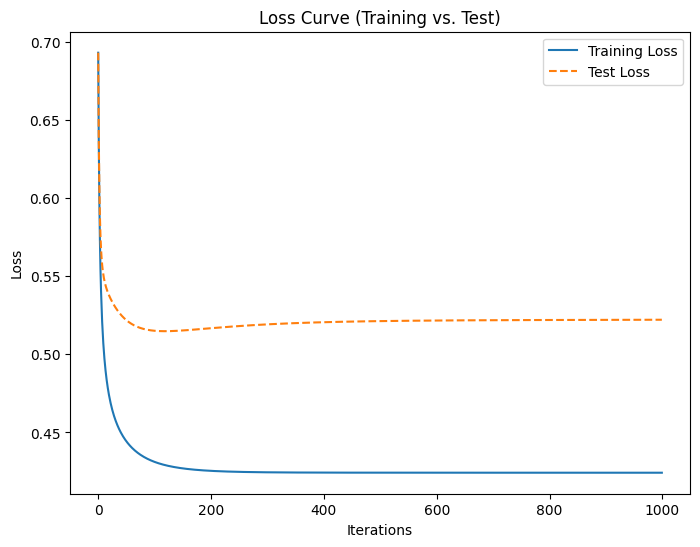

In [193]:
# Plot the loss curve for the best model
loss_curve(best_model)

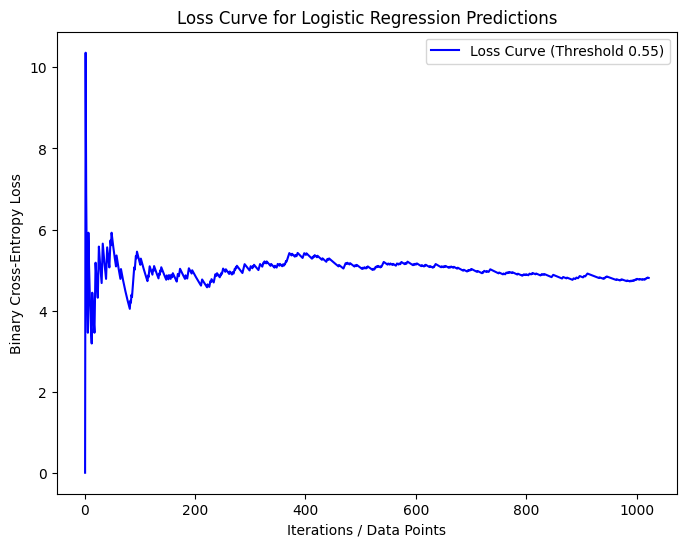

In [203]:
# Track loss values over iterations (simulate iterative updates)
losses = []

# Loop through probabilities and simulate incremental prediction updates
for i in range(1, len(y_test_prob) + 1):
    # Adjust predictions with the threshold
    y_pred_adjusted = [1 if prob >= threshold else 0 for prob in y_test_prob[:i]]

    # Compute binary cross-entropy loss for the adjusted predictions
    loss = -(1 / i) * np.sum(
        y_test[:i] * np.log(np.array(y_pred_adjusted) + 1e-9) + 
        (1 - y_test[:i]) * np.log(1 - np.array(y_pred_adjusted) + 1e-9)
    )

    # Store the loss value
    losses.append(loss)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, color='b', label=f'Loss Curve (Threshold {threshold})')
plt.xlabel('Iterations / Data Points')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss Curve for Logistic Regression Predictions')
plt.legend()
plt.show()